In [1]:
import os
import inspect
import csv as csv
import re
import math
import numpy as np
import numpy.linalg as nla
import pandas as pd
import re
import six
from os.path import join

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNetCV, ElasticNet
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.tree import _tree, DecisionTreeRegressor, plot_tree
from sklearn.feature_selection import mutual_info_regression, RFE, VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import (
    log_loss,
    accuracy_score,
    confusion_matrix,
    precision_recall_fscore_support,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    make_scorer,
    classification_report
)
from lightgbm import LGBMRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

import xgboost as xgb

from category_encoders import TargetEncoder

In [2]:
df = pd.read_csv('pca2.csv')
df.head()

,SERIALNO,SPORDER,WAGP,AGEP,COW,SCHL,SEX,WKHP,ESR,NAICSP,RAC1P,HISP,INDP,OCCP,SCIENGP,SCIENGRLP,RACE
0,2023000000009,1,3600,19,1,19,2,16,1,7220,8,2,8680,4055,3,3,0
1,2023000000028,1,800,23,1,19,1,15,1,7115,1,1,8564,2850,3,3,1
2,2023000000052,1,1800,23,1,20,1,15,1,7115,1,1,8564,2850,3,3,1
3,2023000000125,1,65000,28,1,19,1,40,6,4492,9,2,4796,4760,3,3,0
4,2023000000152,1,3000,20,1,19,2,20,6,61101,2,1,7870,4640,3,3,2


In [3]:
df['wage_log'] = np.log(df['WAGP'])
df.head()

,SERIALNO,SPORDER,WAGP,AGEP,COW,SCHL,SEX,WKHP,ESR,NAICSP,RAC1P,HISP,INDP,OCCP,SCIENGP,SCIENGRLP,RACE,wage_log
0,2023000000009,1,3600,19,1,19,2,16,1,7220,8,2,8680,4055,3,3,0,8.188689
1,2023000000028,1,800,23,1,19,1,15,1,7115,1,1,8564,2850,3,3,1,6.684612
2,2023000000052,1,1800,23,1,20,1,15,1,7115,1,1,8564,2850,3,3,1,7.495542
3,2023000000125,1,65000,28,1,19,1,40,6,4492,9,2,4796,4760,3,3,0,11.082143
4,2023000000152,1,3000,20,1,19,2,20,6,61101,2,1,7870,4640,3,3,2,8.006368


In [ ]:

print(df.dtypes)

# Define features and target
X = df.drop(columns =["WAGP", "wage_log"], axis=1)
y = df["wage_log"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")



SERIALNO       int64
SPORDER        int64
WAGP           int64
AGEP           int64
COW            int64
SCHL           int64
SEX            int64
WKHP           int64
ESR            int64
NAICSP         int64
RAC1P          int64
HISP           int64
INDP           int64
OCCP           int64
SCIENGP        int64
SCIENGRLP      int64
RACE           int64
wage_log     float64
dtype: object
R² Score: 0.628
RMSE: 0.74


# Feature Importance

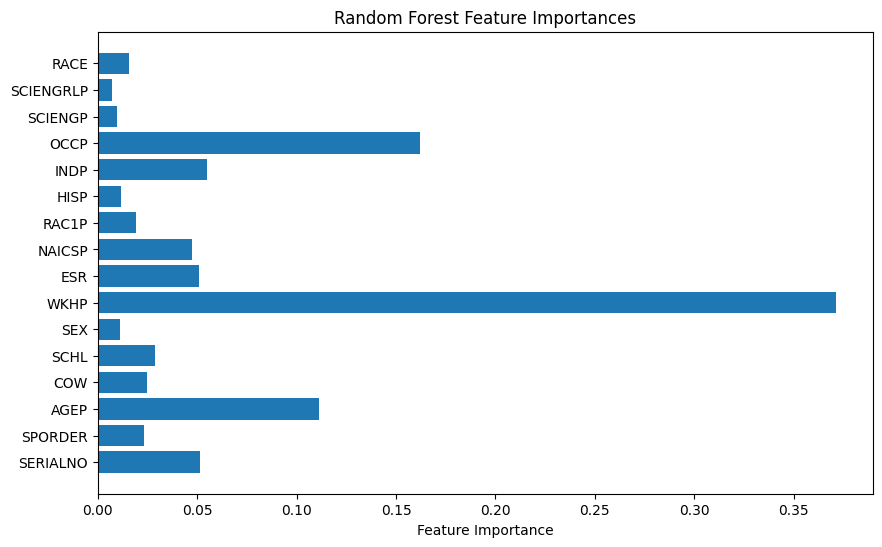

In [6]:
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()
